### 1. Introduction
Cancer mortality is number of deaths due to cancer occuring in a specified population over a given period of time (typically 1 year)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("ols-regression-challenge-data\data\cancer_reg.csv")
data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


4. Basic Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  avghouseholdsize         3047 non-null   float64
 14  percentmarried          

In [4]:
data.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


Missing Values

In [5]:
null_values = data.isnull().sum()
null_values[null_values > 0]

pctsomecol18_24            2285
pctemployed16_over          152
pctprivatecoveragealone     609
dtype: int64

Analysing variables

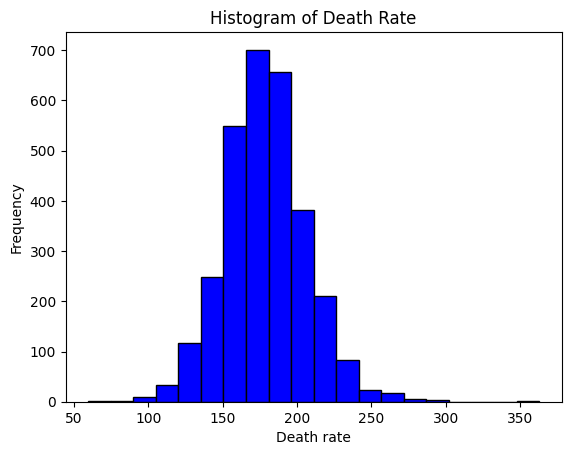

In [6]:
import matplotlib.pyplot as plt

plt.hist(data["target_deathrate"], bins=20, color="blue", edgecolor="black")
plt.xlabel("Death rate")
plt.ylabel("Frequency")
plt.title("Histogram of Death Rate")
plt.show()

Observation
- Slightly Positively skweed data
- There are outliers aswell
- Normal distributed data
- Mean is greater than median (slightly positively skewed)
- There are 3 peaks in the data (bimodal data)

In [7]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Box(y=data["target_deathrate"], boxpoints="outliers", jitter=0.3, pointpos=-1.8)])
fig.update_layout(
    title='Boxplot of Death rate',
    yaxis_title="Death rate",
    width=700,
    height=500)
fig.show()

In [8]:
# !pip install ipykernel
# !pip install --upgrade nbformat

Interpretation of Boxplot

- The Box plot is a standardised way of displaying the distributed data based on five number summary (minimum, first quartile, median, third quartile, maximum)

Mean of avganncount:  606.3385437820807
Standard deviation of avganncount 1416.3562232267052


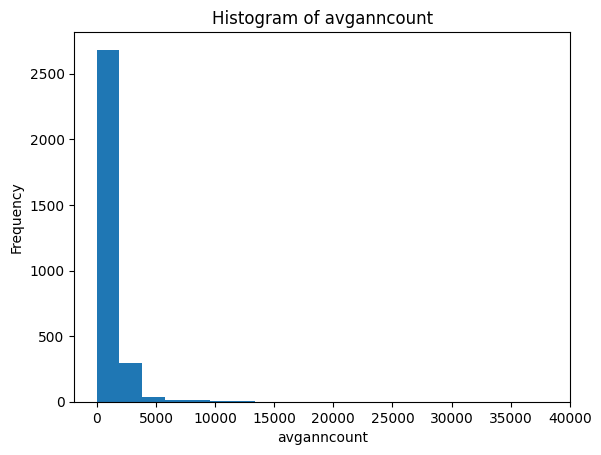

Correlation between avganncount and target_deathrate is:  -0.14353161968868802


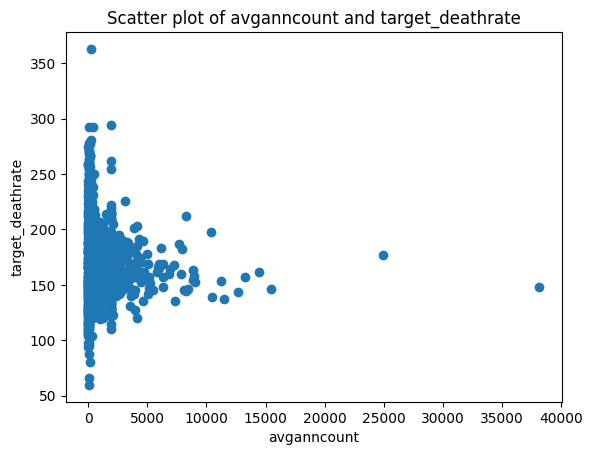

In [11]:
# Analysing avganncount column
avg_ann_count_mean = data['avganncount'].mean()
avg_ann_count_std = data['avganncount'].std()
print('Mean of avganncount: ', avg_ann_count_mean)
print('Standard deviation of avganncount', avg_ann_count_std)

# Create a histogram to visualise the distribution of avganncount
plt.hist(data["avganncount"], bins=20)
plt.xlabel("avganncount")
plt.ylabel("Frequency")
plt.title("Histogram of avganncount")
plt.show()

import plotly.graph_objects as go
fig = go.Figure(data=[go.Box(y=data['avganncount'], boxpoints="outliers", jitter=0.3, pointpos=-1.8)])
fig.update_layout(
    title="Box plot of avganncount",
    xaxis_title="avganncount",
    width=700,
    height=500)
fig.show()

# Calculate the correlation between avganncount and target_deathrate
corr = data['avganncount'].corr(data['target_deathrate'])
print('Correlation between avganncount and target_deathrate is: ', corr)

# Create a scatter plot to visualize the relationship between avganncount and target_deathrate
plt.scatter(data['avganncount'], data['target_deathrate'])
plt.xlabel('avganncount')
plt.ylabel('target_deathrate')
plt.title('Scatter plot of avganncount and target_deathrate')
plt.show()

Dealing with missing values

In [14]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

pctsomecol18_24            2285
pctemployed16_over          152
pctprivatecoveragealone     609
dtype: int64


In [16]:
processed_data = pd.read_csv('ols-regression-challenge-data\cancer_reg_processed.csv')
print(processed_data.shape)
print(processed_data.head())

(3047, 1904)
   avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap  medianage  medianagemale  ...  \
0      260131            11.2   499.748204       39.3           36.9  ...   
1       43269            18.6    23.111234       33.0           32.2  ...   
2       21026            14.6    47.560164       45.0           44.0  ...   
3       75882            17.1   342.637253       42.8           42.2  ...   
4       10321            12.5     0.000000       48.3           47.8  ...   

   state_ South Dakota  state_ Tennessee  s

In [17]:
from scipy.stats import normaltest

numerical_columns = processed_data.select_dtypes(include=np.number).columns
gaussian_col = []
non_gaussian_col = []
for col in numerical_columns:
    stat, p = normaltest(processed_data[col])
    print('Statistics=%.3f, p=%.3f', stat, p)
    alpha = 0.05
    if p > 0.05:
        gaussian_col.append(col)
    else:
        non_gaussian_col.append(col)
print(gaussian_col)
    

Statistics=%.3f, p=%.3f 5028.464817438891 0.0
Statistics=%.3f, p=%.3f 5314.434166040441 0.0
Statistics=%.3f, p=%.3f 127.36333030191835 2.204977826577013e-28
Statistics=%.3f, p=%.3f 943.6411446313668 1.2329032427822804e-205
Statistics=%.3f, p=%.3f 854.4309929761022 2.9017987659865114e-186
Statistics=%.3f, p=%.3f 5801.694327656609 0.0
Statistics=%.3f, p=%.3f 408.56606796323666 1.90987786474014e-89
Statistics=%.3f, p=%.3f 4449.679085091688 0.0
Statistics=%.3f, p=%.3f 4715.992384323132 0.0
Statistics=%.3f, p=%.3f 42.87956403615392 4.884509699418375e-10
Statistics=%.3f, p=%.3f 48.30455897047077 3.241890144699485e-11
Statistics=%.3f, p=%.3f 2293.394861032787 0.0
Statistics=%.3f, p=%.3f 236.29892748967208 4.87910153314711e-52
Statistics=%.3f, p=%.3f 508.65483965936426 3.523749045806528e-111
Statistics=%.3f, p=%.3f 39.66751306112692 2.4339350418308925e-09
Statistics=%.3f, p=%.3f 1395.0296180046441 1.183497662473697e-303
Statistics=%.3f, p=%.3f 55.596307806318556 8.460872542941086e-13
Statistic

In [18]:
len(gaussian_col)

1

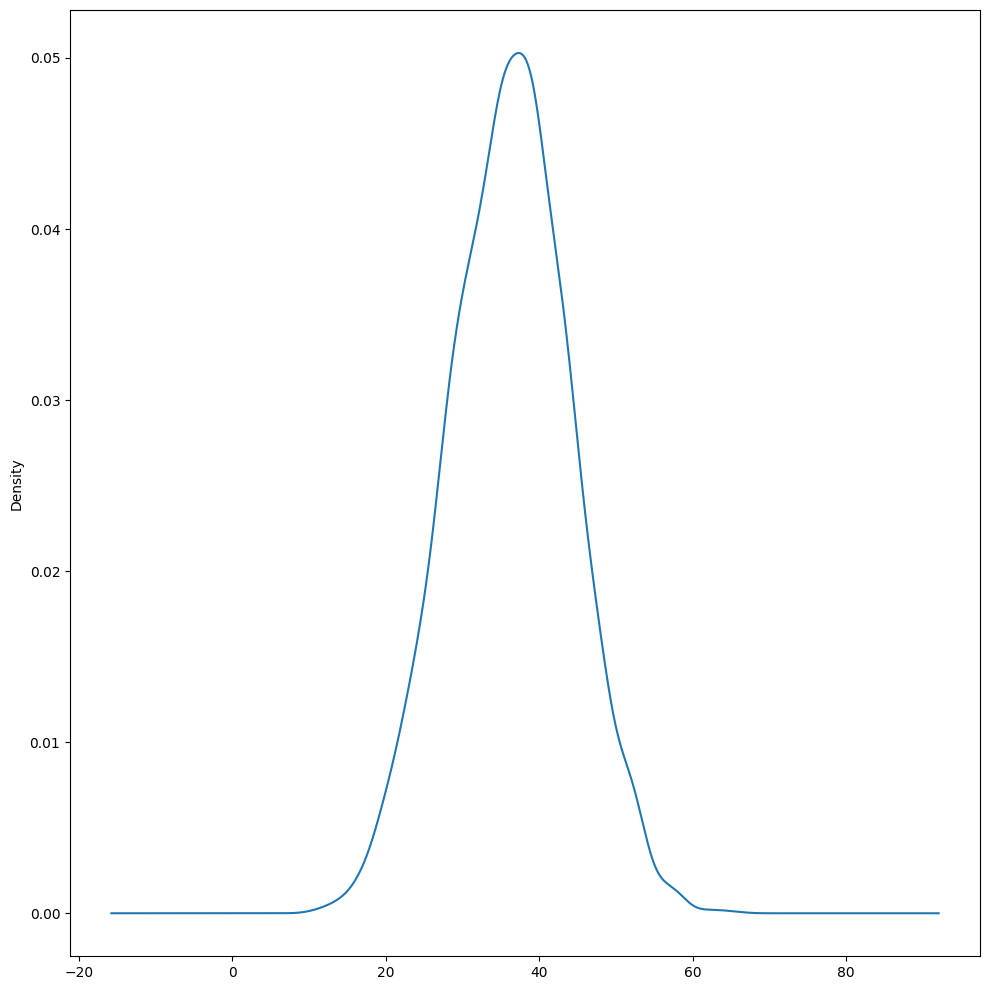

In [19]:
# make subplots for all gaussian columns as density plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
for i, col in enumerate(gaussian_col):
    processed_data[col].plot(kind='density', ax=axes, subplots=True, sharex=False)
plt.tight_layout()
plt.show()


In [27]:
gaussian_data = processed_data[gaussian_col]
basic_info_gaussian = gaussian_data.describe()
basic_info_gaussian

,pctpubliccoverage
count,3047.000000
mean,36.252642
std,7.841741
min,11.200000
25%,30.900000
50%,36.300000
75%,41.550000
max,65.100000


In [28]:
# take mean, std, min, max for every gaussian col
basic_info_gaussian = basic_info_gaussian.loc[['mean', 'std', 'min', 'max']]
basic_info_gaussian

,pctpubliccoverage
mean,36.252642
std,7.841741
min,11.200000
max,65.100000


In [31]:
# dealing with outlier values for incidencerate column
print("Highest allowed ", basic_info_gaussian['pctpubliccoverage']['mean'] + 3 * basic_info_gaussian['pctpubliccoverage']['std'])
print("Lowest allowed ", basic_info_gaussian['pctpubliccoverage']['mean'] - 3 * basic_info_gaussian['pctpubliccoverage']['std'])

processed_data[(processed_data['pctpubliccoverage'] > 12.727419130586192) | (processed_data['pctpubliccoverage'] < 59.777864755203105)]

Highest allowed  59.777864755203105
Lowest allowed  12.727419130586192


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
def deal_with_outliers(df, col, basic_info):
    highest_allowed = basic_info[col]['mean'] + 3 * basic_info[col]['std']
    lowest_allowed = basic_info[col]['mean'] - 3 * basic_info[col]['std']
    df = df[(df[col] > highest_allowed) | df[col] < lowest_allowed]
    return df

cols_have_outliers = []
for col in gaussian_col:
    df = deal_with_outliers(gaussian_data, col, basic_info_gaussian)
    shape = df.shape
    if shape[0] > 0:
        cols_have_outliers.append(col)
print(cols_have_outliers)


['pctpubliccoverage']


In [39]:
# trimming
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]['mean'] + 3 * basic_info_gaussian[col]['std']
    lowest_allowed = basic_info_gaussian[col]['mean'] - 3 * basic_info_gaussian[col]['std']
    trimmed_data = processed_data[(processed_data[col] < highest_allowed) | (processed_data[col] > lowest_allowed)]
trimmed_data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# capping
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]['mean'] + 3 * basic_info_gaussian[col]['std']
    lowest_allowed = basic_info_gaussian[col]['mean'] - 3 * basic_info_gaussian[col]['std']
    capped_data = processed_data.copy()
    capped_data.loc[capped_data[col] > highest_allowed, col] = highest_allowed
    capped_data.loc[capped_data[col] < lowest_allowed, col] = lowest_allowed
capped_data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# To Identify Skeweness

In [44]:
# remove columns which are categorical and have unique value less than 10
cols_to_remove = []
for col in processed_data.columns:
    if processed_data[col].nunique() < 10:
        cols_to_remove.append(col)
print(len(cols_to_remove))
data_for_skewness = processed_data.drop(cols_to_remove, axis=1)

1870


In [47]:
def identify_skewed_cols(df, cols):
    skewed_cols = []
    for col in cols:
        skew = df[col].skew()
        if skew > 1 or skew < -1:
            skewed_cols.append(col)
    return skewed_cols

skewed_cols = identify_skewed_cols(data_for_skewness, data_for_skewness.columns)
len(skewed_cols)

16

In [49]:
skewed_data = data_for_skewness[skewed_cols]

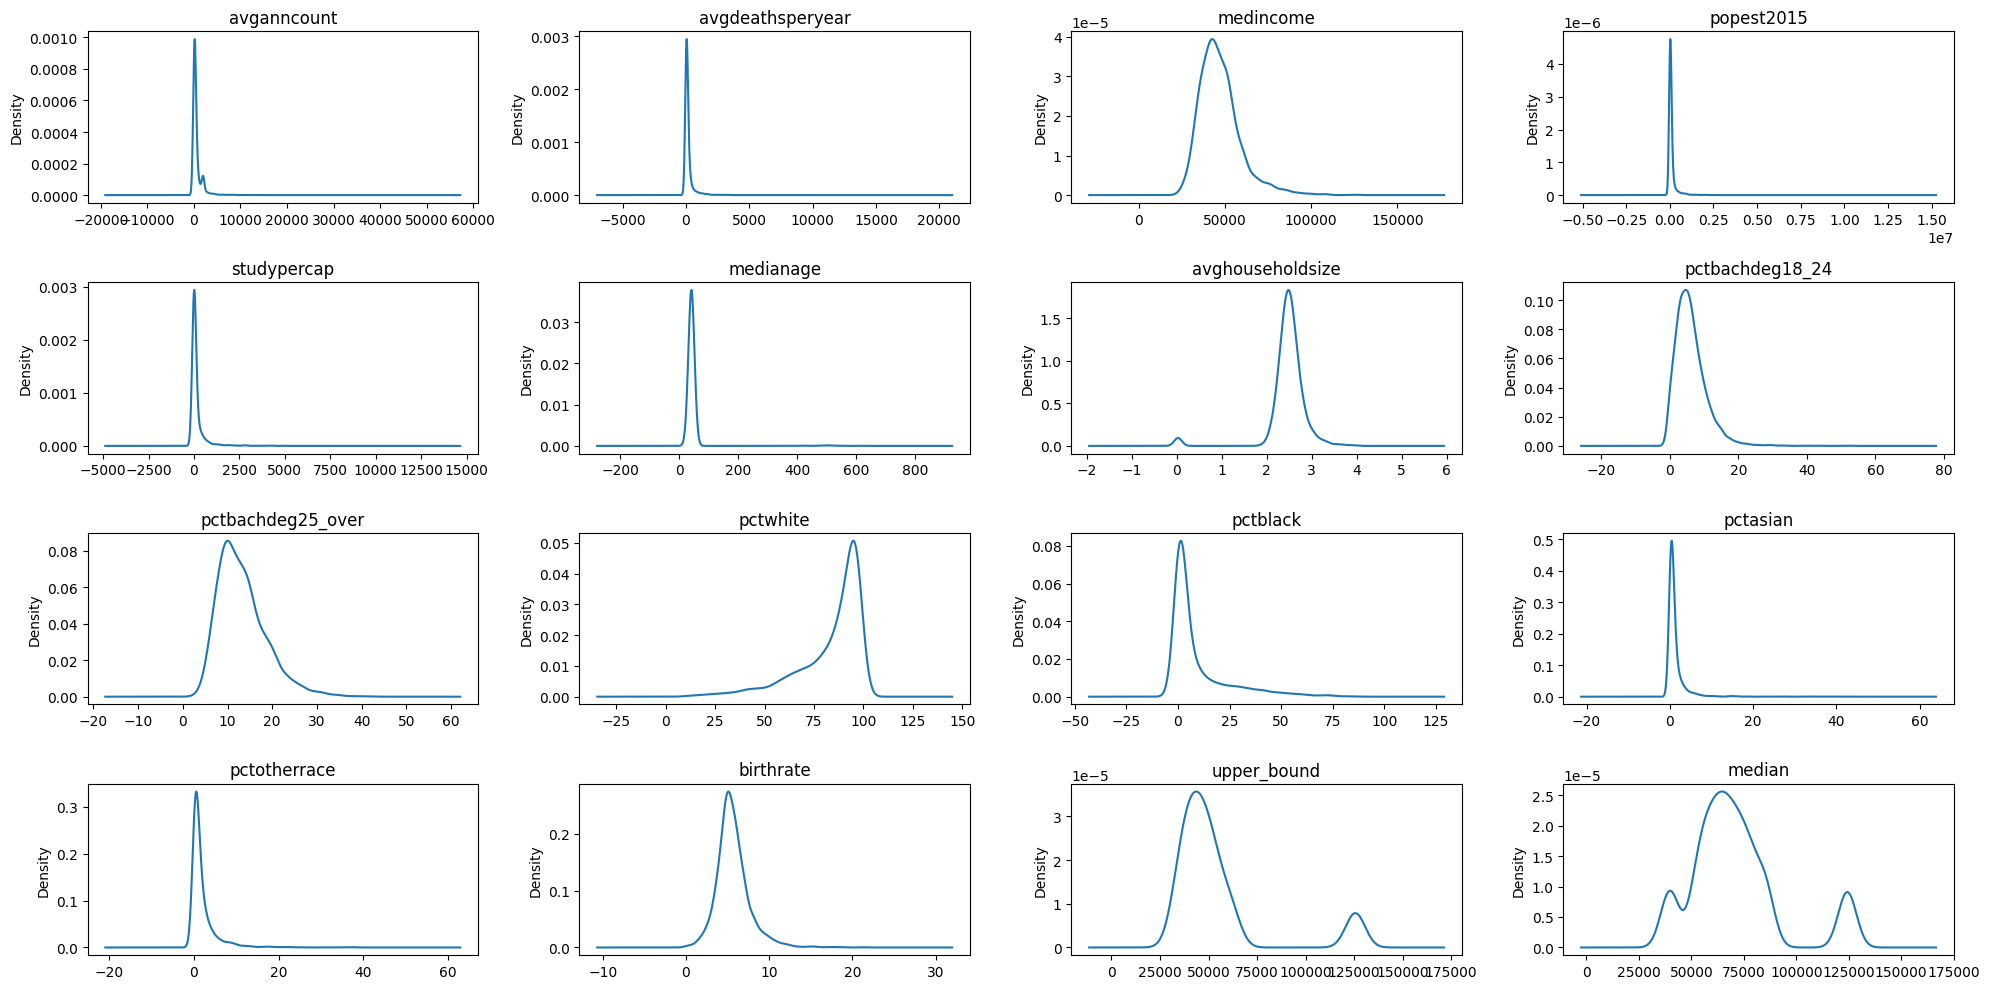

In [52]:
# plot the distribution of the skewed columns which is around 16 columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
for i, col in enumerate(skewed_cols):
    # plot title
    axes[i//4, i%4].set_title(col)
    skewed_data[col].plot(kind='density', ax=axes[i//4, i%4], subplots=True, sharex=False)
plt.tight_layout()
plt.show()

In [56]:
import plotly.graph_objects as go

def box_plot(df, col):
    fig = go.Figure(data=[go.Box(y=df[col], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
    fig.update_layout(
        title = "Boxplot of " + col,
        yaxis_title = col,
        width=700,
        height=500)
    fig.show()

for col in skewed_cols:
    box_plot(processed_data, col)

In [57]:
# checking outlier values for studypercap column
percentile25 = processed_data['studypercap'].quantile(0.25)
percentile75 = processed_data['studypercap'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * (iqr)
lower_limit = percentile25 - 1.5 * (iqr)
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

processed_data[(processed_data['studypercap'] > upper_limit) | (processed_data['studypercap'] < lower_limit) ]


Upper limit:  209.1269406875
Lower limit:  -125.4761644125


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,4025.000000,1380,177.8,510.900000,60397,843954,13.1,427.748432,35.8,34.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,740.000000,269,172.7,499.300000,51395,121846,15.7,837.122269,41.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,2265.000000,901,171.0,440.700000,50083,490945,16.3,462.373586,37.2,35.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,1962.667684,138,153.7,453.549422,49246,118053,19.4,660.720185,28.8,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3039,1962.667684,9,208.3,453.549422,49256,2968,10.5,673.854447,45.2,45.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3041,1962.667684,48,146.4,453.549422,49508,29029,13.0,723.414516,32.2,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
def deal_with_outlier_with_iqr(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_bound = percentile75 + 1.5 * iqr
    lower_bound = percentile25 - 1.5 * iqr
    outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    return outliers

cols_have_outliers_skewed = []
for col in skewed_cols:
    outliers = deal_with_outlier_with_iqr(processed_data, col)
    shape = outliers.shape
    if shape[0] > 0:
        cols_have_outliers_skewed.append(col)
print(cols_have_outliers_skewed)
print(len(cols_have_outliers_skewed))

['avganncount', 'avgdeathsperyear', 'medincome', 'popest2015', 'studypercap', 'medianage', 'avghouseholdsize', 'pctbachdeg18_24', 'pctbachdeg25_over', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'birthrate', 'upper_bound', 'median']
16


# Trimming

In [61]:
# find how many values greater than upper limit and lower than lower limit
rows_to_remove = processed_data[(processed_data['studypercap'] > upper_limit) | (processed_data['studypercap'] < lower_limit)]
# trimme the data
trimmed_data = processed_data[(processed_data['studypercap'] < upper_limit) & (processed_data['studypercap'] > lower_limit)]
trimmed_data.shape

(2543, 1904)

# Capping

In [62]:
# cap the data
capped_data = processed_data.copy()
capped_data.loc[capped_data['studypercap'] > upper_limit, 'studypercap'] = upper_limit
capped_data.loc[capped_data['studypercap'] < lower_limit, 'studypercap'] = lower_limit
capped_data.shape

(3047, 1904)

In [63]:
def capping(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit
    return df

for col in cols_have_outliers_skewed:
    capped_data = capping(processed_data, col)
capped_data.shape

(3047, 1904)

In [64]:
# box plot of the capped data
for col in cols_have_outliers_skewed:
    box_plot(capped_data, col)

Assignment -> Outlier detection using percentile method

In [65]:
# sadve the capped data
capped_data.to_csv('ols-regression-challenge-data/capped_data.csv', index=False)